In [1]:
#direct to the google drive directory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import all necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import os
import imageio
import cv2

In [3]:
#direct to the path of all images
path="drive/MyDrive/STATS302_FINAL_PROJECT/images/"

In [4]:
#import the label file
annotation=pd.read_csv('drive/MyDrive/STATS302_FINAL_PROJECT/annotation.csv')

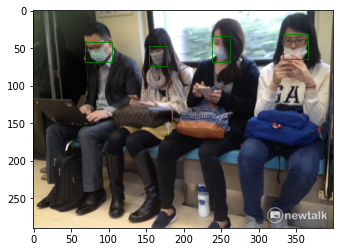

In [10]:
#visualize some of the images to see if the coordinates are correct or not
piclist=[]
for i in range(2,3):
  pic=imageio.imread(path+'maksssksksss'+str(i)+'.png')
  ig, ax1 = plt.subplots(1)
  p = plt.imshow(pic)
  name='maksssksksss'+str(i)
  data1=annotation[annotation['file']==name]
  for j in range(len(data1)):
    person=data1.iloc[j]
    if person["name"]=='without_mask':
      color='r'
    else:
      color='g'
    x0=person['xmin']
    x1=person['xmax']
    y0=person['ymin']
    y1=person['ymax']
    upleft = (x0, y0)
    width = x1-x0
    height = y1-y0
    rect = patches.Rectangle(upleft, width, height, linewidth=0.8, edgecolor=color, facecolor='none')
    ax1.add_patch(rect) 


In [ ]:
##create a new folder for the segmented faces
path2="drive/MyDrive/STATS302_FINAL_PROJECT/final_segment_images/"

In [ ]:
##segment all the images according to the coordinates
count=0
label=[]
for i in range(853):
  pic=cv2.imread(path+'maksssksksss'+str(i)+'.png')
  name='maksssksksss'+str(i)
  annotate=annotation[annotation['file']==name]
  for j in range(len(annotate)):
    person=annotate.iloc[j]
    x0=person['xmin']
    x1=person['xmax']
    y0=person['ymin']
    y1=person['ymax']
    cropped=pic[y0:y1,x0:x1] #segmentation
    #print(cropped.shape)
    if cropped.shape < (40,40,3): #set a threshold to the faces so that unclear images will be excluded
      continue
    print(person['name'])
    label.append(person['name'])
    #pic2=cv2.resize(cropped,(128,128),interpolation=cv2.INTER_AREA)
    #cv2.imwrite(path2+str(count)+'.png',pic2)
    count=count+1
label


with_mask
without_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
mask_weared_incorrect
with_mask
mask_weared_incorrect
with_mask
with_mask
with_mask
with_mask
without_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
mask_weared_incorrect
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
mask_weared_incorrect
mask_weared_incorrect
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
without_mask
with_mask
without_mask
with_mask
without_mask
without_mask
without_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
without_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
with_mask
without_mask
wit

['with_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'mask_weared_incorrect',
 'with_mask',
 'mask_weared_incorrect',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'mask_weared_incorrect',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'mask_weared_incorrect',
 'mask_weared_incorrect',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 'with_mask',
 'without_mask',
 

In [ ]:
labels1=pd.Series(label)
labels1 #label for each image

0         with_mask
1      without_mask
2         with_mask
3         with_mask
4         with_mask
           ...     
992       with_mask
993       with_mask
994       with_mask
995       with_mask
996       with_mask
Length: 997, dtype: object

In [ ]:
label1=pd.DataFrame(labels1)

In [ ]:
label1.to_csv("drive/MyDrive/STATS302_FINAL_PROJECT/label.csv") #export the label file

In [ ]:
labels=pd.read_csv("drive/MyDrive/STATS302_FINAL_PROJECT/label.csv") #import the label file

In [ ]:
real_label=labels.drop(['Unnamed: 0'],axis=1)
real_label.rename(columns={'0':'tag'},inplace=True)
real_label

,tag
0,with_mask
1,without_mask
2,with_mask
3,with_mask
4,with_mask
...,...
992,with_mask
993,with_mask
994,with_mask
995,with_mask


In [ ]:
## expand dataset with new images
labels2=pd.Series(['without_mask']*600+['mask_waered_incorrect']*490)
labels3=pd.DataFrame(labels2)
labels3.rename(columns={0:"tag"},inplace=True)
labels3
labels4=pd.concat([real_label,labels3])
labels4.index=range(len(labels4))
labels4
labels4.to_csv("drive/MyDrive/STATS302_FINAL_PROJECT/final_label_2.csv")
#labels3=pd.Series([mask_weared_i])

In [ ]:
##import all necessary libraries for image processing and pilot test
from skimage.feature import hog
from skimage.color import rgb2grey
from PIL import Image
from IPython.display import display
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [ ]:
##define a function to convert image files into a numpy array
def get_image(row_id):
  root="drive/MyDrive/STATS302_FINAL_PROJECT/final_segment_images"
  filename = "{}.png".format(row_id)
  file_path = os.path.join(root, filename)
  img=Image.open(file_path)
  return np.array(img)

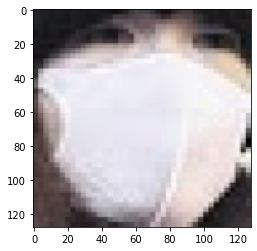

In [ ]:
##show visualization of images
plt.imshow(get_image(0))

Color bombus image has shape:  [[[32 33 37]
  [32 33 37]
  [32 33 37]
  ...
  [38 36 39]
  [38 36 39]
  [38 36 39]]

 [[32 33 37]
  [32 33 37]
  [32 33 37]
  ...
  [38 36 39]
  [38 36 39]
  [38 36 39]]

 [[32 33 37]
  [32 33 37]
  [32 33 37]
  ...
  [37 35 38]
  [37 35 38]
  [37 35 38]]

 ...

 [[88 73 76]
  [88 73 76]
  [88 73 76]
  ...
  [70 58 62]
  [70 58 62]
  [70 58 62]]

 [[88 73 76]
  [88 73 76]
  [88 73 76]
  ...
  [70 58 62]
  [70 58 62]
  [70 58 62]]

 [[88 73 76]
  [88 73 76]
  [88 73 76]
  ...
  [70 58 62]
  [70 58 62]
  [70 58 62]]]
Greyscale bombus image has shape:  [[0.12970941 0.12970941 0.12970941 ... 0.14369137 0.14369137 0.14369137]
 [0.12970941 0.12970941 0.12970941 ... 0.14369137 0.14369137 0.14369137]
 [0.12970941 0.12970941 0.12970941 ... 0.1397698  0.1397698  0.1397698 ]
 ...
 [0.29962275 0.29962275 0.29962275 ... 0.23858196 0.23858196 0.23858196]
 [0.29962275 0.29962275 0.29962275 ... 0.23858196 0.23858196 0.23858196]
 [0.29962275 0.29962275 0.29962275 ... 0.2

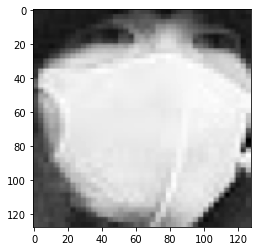

In [ ]:
##show the greyscale image files
image0 = get_image(0)

print('Color bombus image has shape: ', image0)

# convert the bombus image to greyscale
grey_image0 = rgb2grey(image0)

plt.imshow(grey_image0, cmap=mpl.cm.gray)

print('Greyscale bombus image has shape: ', grey_image0)

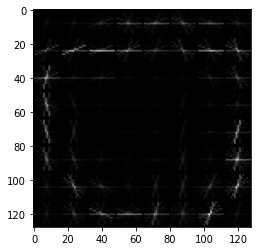

In [ ]:
##show the hog of images
image0_features, image0_image = hog(grey_image0,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(image0_image, cmap=mpl.cm.gray)


In [ ]:
##create features for each image
def create_features(img):
    # flatten three channel color image
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    flat_features = np.hstack((grey_image))
    return flat_features

image0_features = create_features(image0)

print(image0_features)

[0.12970941 0.12970941 0.12970941 ... 0.23858196 0.23858196 0.23858196]


In [ ]:
##create a matrix of all images
def create_feature_matrix(label_list):
    features_list = []
    
    for img_id in range(len(label_list)):
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(real_label)

In [ ]:
feature_matrix.shape

(997, 16384)

In [ ]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
image_stand = ss.fit_transform(feature_matrix)



Feature matrix shape is:  (997, 16384)


In [ ]:
#split training and test set
X = pd.DataFrame(image_stand)
y = real_label
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.3,
                                                    random_state=1234123)

In [ ]:
# define support vector classifier
svm = SVC(kernel='rbf', C=10)

# fit model
svm.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# generate predictions
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy is: ', accuracy)

Model accuracy is:  0.8866666666666667


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) #construct the confusion matrix

array([[  1,  10,   1],
       [  0, 241,   4],
       [  0,  19,  24]])

In [ ]:
#draw confusion matrix
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    
    plt.imshow(cm, interpolation='nearest')    
    plt.title(title)    
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name, rotation=90)    
    plt.yticks(num_local, labels_name)    
    plt.ylabel('True label')    
    plt.xlabel('Predicted label')

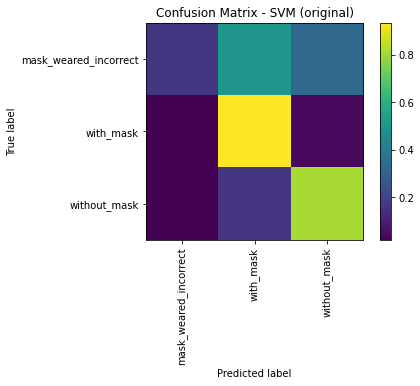

In [ ]:
plot_confusion_matrix(a, ['mask_weared_incorrect', 'with_mask','without_mask'], "Confusion Matrix - SVM (original)")
# plt.savefig('/HAR_cm.png', format='png')
plt.show()